# Covid-19 Data Analysis

## Introduction
The outbreak of COVID-19 has had profound global impacts, necessitating accurate forecasting of its spread to inform public health interventions. Time series analysis, particularly ARIMA modeling, offers a robust method for predicting trends in infectious disease dynamics. This project focuses on utilizing ARIMA to forecast COVID-19 confirmed cases, specifically examining data from the United States.

## Research Objectives
- **Data Processing and Visualization:** Preprocess and visualize COVID-19 data to understand the temporal evolution of confirmed cases in the US.

- **ARIMA Model Implementation:** Apply ARIMA (AutoRegressive Integrated Moving Average) modeling to capture underlying patterns and variations in daily confirmed cases.

- **Model Evaluation:** Assess the predictive accuracy of the ARIMA model using metrics such as Mean Squared Error (MSE) and Mean Absolute Error (MAE).

- **Visualization of Predictions:** Illustrate model predictions against actual data to evaluate its effectiveness in capturing COVID-19 dynamics.

By achieving these objectives, this study aims to provide insights into the applicability of ARIMA modeling for forecasting COVID-19 trends, thereby aiding in proactive decision-making and resource allocation during public health emergencies.

## Data Set Up

The data comes from John Hopkins University

In [23]:
# importing the necessary libraries

import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


# call out John Hopkins Unviersity's covid-19 data

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"


# reading data

df = pd.read_csv(url)
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [25]:
# data processing

df.info()

# filling null values

df = df.fillna(0)

# changing the data format(adding date and confrimed)

df_melted = df.melt(id_vars=['Province/State', 'Country/Region','Lat','Long'], var_name = 'Date', value_name = 'Confirmed')

# Changing the Date row into datetime format

df_melted['Date'] = pd.to_datetime(df_melted['Date'])

# Checking data

print(df_melted.head())
print(df_melted.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1147 entries, Province/State to 3/9/23
dtypes: float64(2), int64(1143), object(2)
memory usage: 2.5+ MB


<ipython-input-25-7eb10538c7f8>:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_melted['Date'] = pd.to_datetime(df_melted['Date'])


  Province/State Country/Region       Lat       Long       Date  Confirmed
0              0    Afghanistan  33.93911  67.709953 2020-01-22          0
1              0        Albania  41.15330  20.168300 2020-01-22          0
2              0        Algeria  28.03390   1.659600 2020-01-22          0
3              0        Andorra  42.50630   1.521800 2020-01-22          0
4              0         Angola -11.20270  17.873900 2020-01-22          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  330327 non-null  object        
 1   Country/Region  330327 non-null  object        
 2   Lat             330327 non-null  float64       
 3   Long            330327 non-null  float64       
 4   Date            330327 non-null  datetime64[ns]
 5   Confirmed       330327 non-null  int64         
dtypes: datetime

## Data Visualization

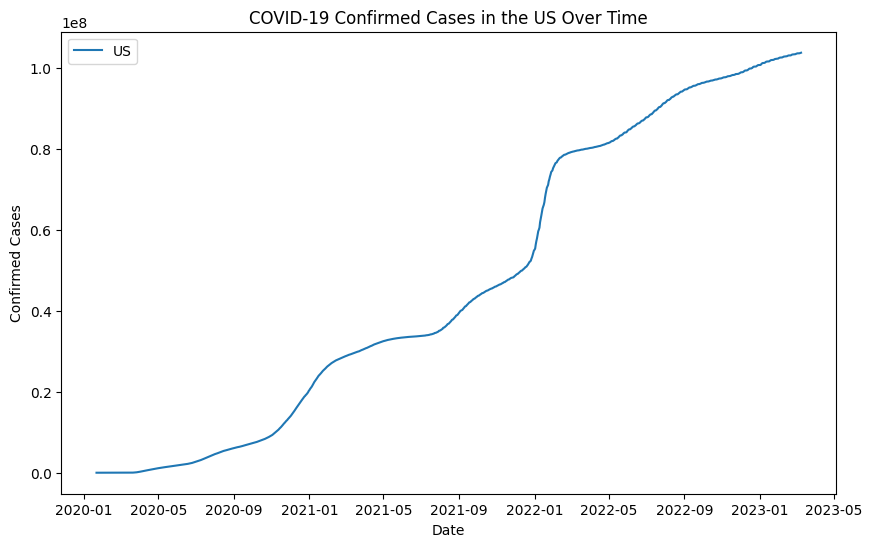

In [11]:
# filter by specific country

us_data = df_melted[df_melted['Country/Region'] == 'US']

# Visualization of confirmed cases

plt.figure(figsize=(10, 6))
plt.plot(us_data['Date'], us_data['Confirmed'], label='US')
plt.legend()
plt.title('COVID-19 Confirmed Cases in the US Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.show()

## Data Analysis and Modeling

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Mean Squared Error: 16725674070225.803
Mean Absolute Error: 3418159.6606659587


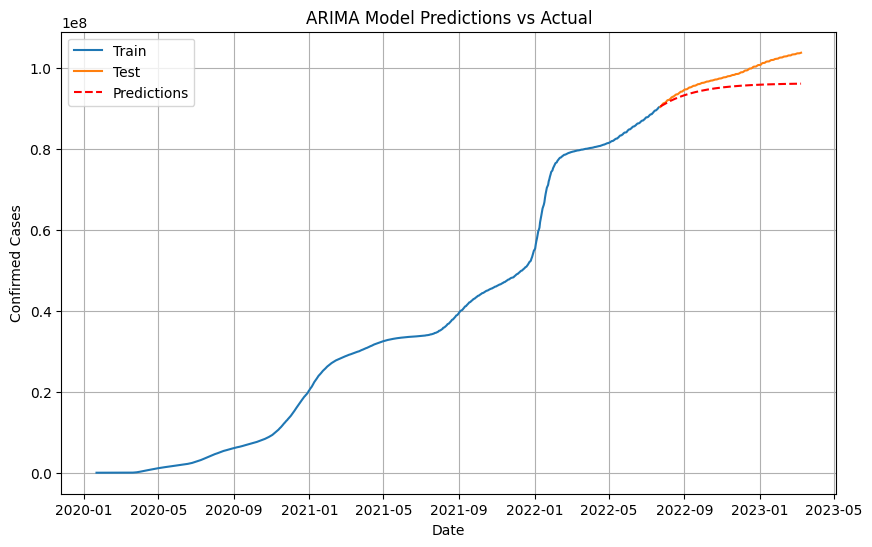

In [26]:
# Spliting data

train_size = int(len(us_confirmed) * 0.8)
train, test = us_confirmed[:train_size], us_confirmed[train_size:]

# Extracting daily confirmed case number

us_confirmed = us_data.set_index('Date')['Confirmed']
us_confirmed = us_confirmed.asfreq('D')

# ARIMA Model building

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# prediction testing

start_index = test.index[0]
end_index = test.index[-1]
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Evaluation

mse = mean_squared_error(test, predictions)
mae = mean_absolute_error(test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

# Prediction Visualization
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions, label='Predictions', color='red', linestyle='--')
plt.legend()
plt.title('ARIMA Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.show()


## Summary and Results
- **Data Processing:** The dataset was initially inspected for completeness and any missing values were filled with zeros to ensure continuity in analysis.
Visualization: A time series plot was generated to visualize the progression of COVID-19 confirmed cases in the US over time.
- **ARIMA Modeling:** An ARIMA model (AutoRegressive Integrated Moving Average) was applied to the time series data. The model was trained on a subset of the data (80% split) and then tested on the remaining data.
Prediction Evaluation: Mean Squared Error (MSE) and Mean Absolute Error (MAE) were calculated to assess the accuracy of the model predictions against the test dataset.
- **Prediction Visualization:** The model's predictions were visualized alongside the actual test data to illustrate how well the model fit the observed data.

This project demonstrates the application of time series analysis techniques, specifically ARIMA modeling, to forecast COVID-19 confirmed cases. The results provide insights into the effectiveness of the model in capturing and predicting the dynamics of the pandemic.